In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict



In [3]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 5)

In [4]:
df = pd.read_csv('old_contact_network.csv')


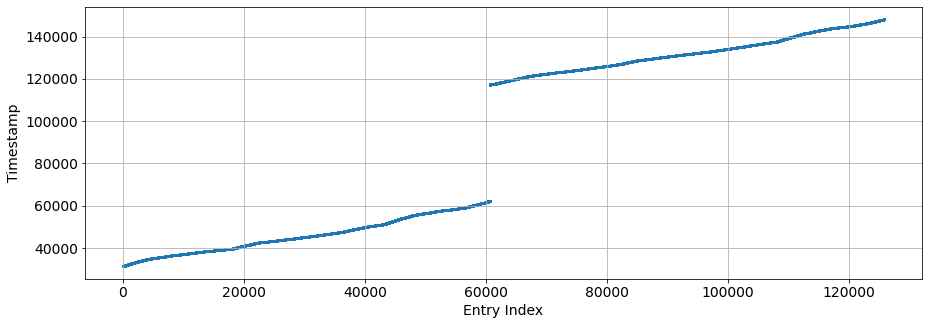

In [5]:
plt.grid()
plt.ylabel('Timestamp')
plt.xlabel('Entry Index')
plt.scatter(df.index, df.Time, s = 1)
plt.show()

In [6]:
unique_timestamps = list(set(df.Time))
unique_timestamps.sort()

gaps = defaultdict(int)

for i in range(len(unique_timestamps) - 1):
    gaps[unique_timestamps[i + 1] - unique_timestamps[i]] += 1

print(gaps)

defaultdict(<class 'int'>, {20: 3098, 54940: 1})


In [7]:
correct_gap = 20
offset = 54940 - correct_gap

for index in range(1, df.shape[0]):
    if df.Time[index] - df.Time[index-1] > correct_gap:
        df.at[index, 'Time'] -= offset

In [8]:
unique_timestamps = list(set(df.Time))
unique_timestamps.sort()

gaps = defaultdict(int)

for i in range(len(unique_timestamps)-1):
    gaps[unique_timestamps[i + 1] - unique_timestamps[i]] += 1

print(gaps)

defaultdict(<class 'int'>, {20: 3099})


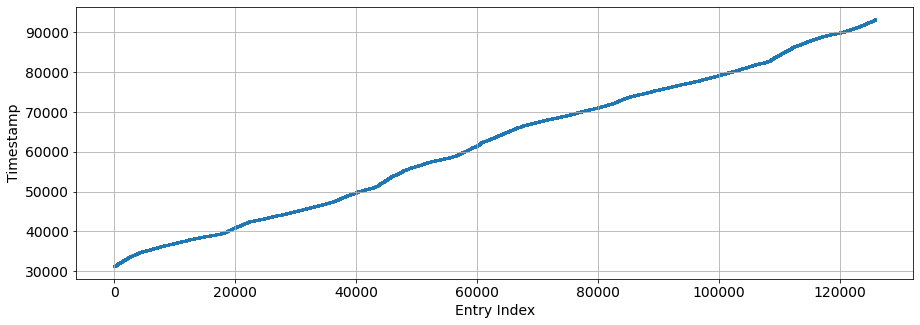

In [9]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14

plt.grid()
plt.ylabel('Timestamp')
plt.xlabel('Entry Index')
plt.scatter(df.index, df.Time, s = 1)
plt.show()

In [10]:
df.to_csv('contact_network.csv', index = False)